In [25]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/3rd-programming-competition-bahrain-ai/house_data_train4.csv
/kaggle/input/3rd-programming-competition-bahrain-ai/house_data_test4.csv


In [27]:
df_train['house_age'] = 2023 - df_train['yr_built']
df_train['total_rooms'] = df_train['bedrooms'] + df_train['bathrooms']
df_train['outdoor_area'] = df_train['metersq_land'] - (df_train['metersq_living'] + df_train['metersq_above'])
df_train['average_quality'] = df_train['grade'] * df_train['condition']
df_train['total_area'] = df_train['metersq_living'] + df_train['metersq_above']+ df_train['metersq_basement']

df_train


,id,sale_price,bedrooms,bathrooms,metersq_living,metersq_lot,floors,waterfront,view,condition,...,block_no,location1,location2,metersq_built,metersq_land,house_age,total_rooms,outdoor_area,average_quality,total_area
0,2,442573.0,3,1.75,1780,7567,1.0,0,0,3,...,34,0.7314,-0.225,1910,8645,43,4.75,5575,21,3560
1,3,800000.0,4,2.25,2510,9963,1.0,0,0,4,...,5,0.5973,-0.177,3110,9963,56,6.25,5253,36,5020
2,4,205000.0,3,0.75,1080,5025,1.0,0,0,3,...,146,0.4936,-0.335,1370,6000,75,3.75,3840,15,2160
3,5,353000.0,4,1.50,1100,9600,1.0,0,0,4,...,33,0.7000,-0.175,1100,9630,63,5.50,7430,24,2200
4,6,230000.0,3,1.00,1380,10112,1.0,0,0,4,...,23,0.3196,-0.351,1240,10112,60,4.00,7792,28,2760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28980,33305,230000.0,6,3.00,2180,7220,2.0,0,0,3,...,2040,1.5346,-1.495,2260,7344,43,9.00,2984,21,4360
28981,33306,230000.0,3,1.00,1020,12289,1.0,0,0,4,...,2046,1.6535,-1.345,1300,9894,56,4.00,7854,28,2040
28982,33307,225000.0,3,1.75,1460,8372,1.0,0,0,4,...,2035,1.5983,-1.277,1220,7803,42,4.75,4883,28,2920
28983,33308,225000.0,2,1.00,830,5720,1.0,0,0,4,...,2038,1.9639,-1.529,1150,5250,73,3.00,3590,24,1660


In [28]:
df_test['house_age'] = 2023 - df_test['yr_built']
df_test['total_rooms'] = df_test['bedrooms'] + df_test['bathrooms']
df_test['outdoor_area'] = df_test['metersq_land'] - (df_test['metersq_living'] + df_test['metersq_above'])
df_test['average_quality'] = df_test['grade'] * df_test['condition']
df_test['total_area'] = df_test['metersq_living'] + df_test['metersq_above']+ df_test['metersq_basement']
id_test = df_test['id']
df_test

,id,bedrooms,bathrooms,metersq_living,metersq_lot,floors,waterfront,view,condition,grade,...,block_no,location1,location2,metersq_built,metersq_land,house_age,total_rooms,outdoor_area,average_quality,total_area
0,17292,3,3.00,2860,4500,2.0,0,2,3,8,...,119,0.6463,-0.371,2310,4500,108,6.00,-340,24,5720
1,17293,4,3.00,2100,8400,1.0,0,0,4,7,...,72,0.7350,-0.170,1980,8610,47,7.00,5270,28,4200
2,17294,2,2.00,1100,3000,2.0,0,0,3,7,...,117,0.6797,-0.362,1390,4000,111,4.00,1800,21,2200
3,17295,3,1.75,1880,5978,1.0,0,0,5,7,...,144,0.5793,-0.294,1930,4770,66,4.75,1950,35,3760
4,17296,3,1.50,2440,7200,1.0,0,0,3,7,...,118,0.5604,-0.274,1920,6900,74,4.50,2020,21,4880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,36230,2,1.50,1556,20000,1.0,0,0,4,7,...,2066,1.6191,-1.472,2250,17286,66,3.50,14174,28,3112
7244,36231,3,2.00,1680,7000,2.0,0,0,4,7,...,2072,1.5075,-1.393,1540,7480,55,5.00,4120,28,3360
7245,36232,2,1.00,1070,6120,1.0,0,0,3,6,...,2056,1.7289,-1.507,1130,6120,61,3.00,3980,18,2140
7246,36233,4,1.00,1030,6621,1.0,0,0,4,6,...,2042,1.7157,-1.411,1420,6631,68,5.00,4571,24,2060


In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28985 entries, 0 to 28984
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                28985 non-null  int64  
 1   sale_price        28985 non-null  float64
 2   bedrooms          28985 non-null  int64  
 3   bathrooms         28985 non-null  float64
 4   metersq_living    28985 non-null  int64  
 5   metersq_lot       28985 non-null  int64  
 6   floors            28985 non-null  float64
 7   waterfront        28985 non-null  int64  
 8   view              28985 non-null  int64  
 9   condition         28985 non-null  int64  
 10  grade             28985 non-null  int64  
 11  metersq_above     28985 non-null  int64  
 12  metersq_basement  28985 non-null  int64  
 13  yr_built          28985 non-null  int64  
 14  block_no          28985 non-null  int64  
 15  location1         28985 non-null  float64
 16  location2         28985 non-null  float6

In [30]:
df_train.describe()

,id,sale_price,bedrooms,bathrooms,metersq_living,metersq_lot,floors,waterfront,view,condition,...,block_no,location1,location2,metersq_built,metersq_land,house_age,total_rooms,outdoor_area,average_quality,total_area
count,28985.000000,2.898500e+04,28985.000000,28985.000000,28985.000000,2.898500e+04,28985.000000,28985.000000,28985.000000,28985.000000,...,28985.000000,28985.000000,28985.000000,28985.000000,28985.000000,28985.000000,28985.000000,28985.000000,28985.000000,28985.000000
mean,16238.263757,5.415843e+05,3.374815,2.197438,2091.549491,1.511500e+04,1.547162,0.007349,0.234846,3.422632,...,866.813076,1.058135,-6.158961,1996.093462,12739.955770,52.099224,5.572253,8852.625185,26.148042,4183.098982
std,10230.873850,3.676202e+05,0.924003,0.826821,924.060330,4.028448e+04,0.567486,0.085410,0.767752,0.657416,...,960.062663,0.620457,258.019163,689.743649,26676.279083,29.460361,1.518505,26393.399351,5.824628,1848.120661
min,2.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.155900,-12197.000000,399.000000,651.000000,8.000000,0.000000,-11820.000000,1.000000,580.000000
25%,7248.000000,3.244500e+05,3.000000,1.750000,1440.000000,5.033000e+03,1.000000,0.000000,0.000000,3.000000,...,55.000000,0.546100,-1.370000,1490.000000,5100.000000,26.000000,4.750000,1300.000000,21.000000,2880.000000
50%,14494.000000,4.520000e+05,3.000000,2.250000,1930.000000,7.623000e+03,2.000000,0.000000,0.000000,3.000000,...,133.000000,0.702700,-0.356000,1850.000000,7624.000000,48.000000,5.500000,4070.000000,24.000000,3860.000000
75%,26063.000000,6.450000e+05,4.000000,3.000000,2560.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,2024.000000,1.768200,-0.196000,2380.000000,10133.000000,72.000000,6.500000,6560.000000,28.000000,5120.000000
max,33309.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,4.000000,5.000000,...,2072.000000,2.007600,0.681000,6210.000000,871200.000000,123.000000,34.750000,862050.000000,60.000000,27080.000000


In [31]:
df_train.columns

Index(['id', 'sale_price', 'bedrooms', 'bathrooms', 'metersq_living',
       'metersq_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'metersq_above', 'metersq_basement', 'yr_built', 'block_no',
       'location1', 'location2', 'metersq_built', 'metersq_land', 'house_age',
       'total_rooms', 'outdoor_area', 'average_quality', 'total_area'],
      dtype='object')

In [32]:
print("Skewness: %f" % df_train['sale_price'].skew())
print("Kurtosis: %f" % df_train['sale_price'].kurt())

Skewness: 4.119715
Kurtosis: 36.665872


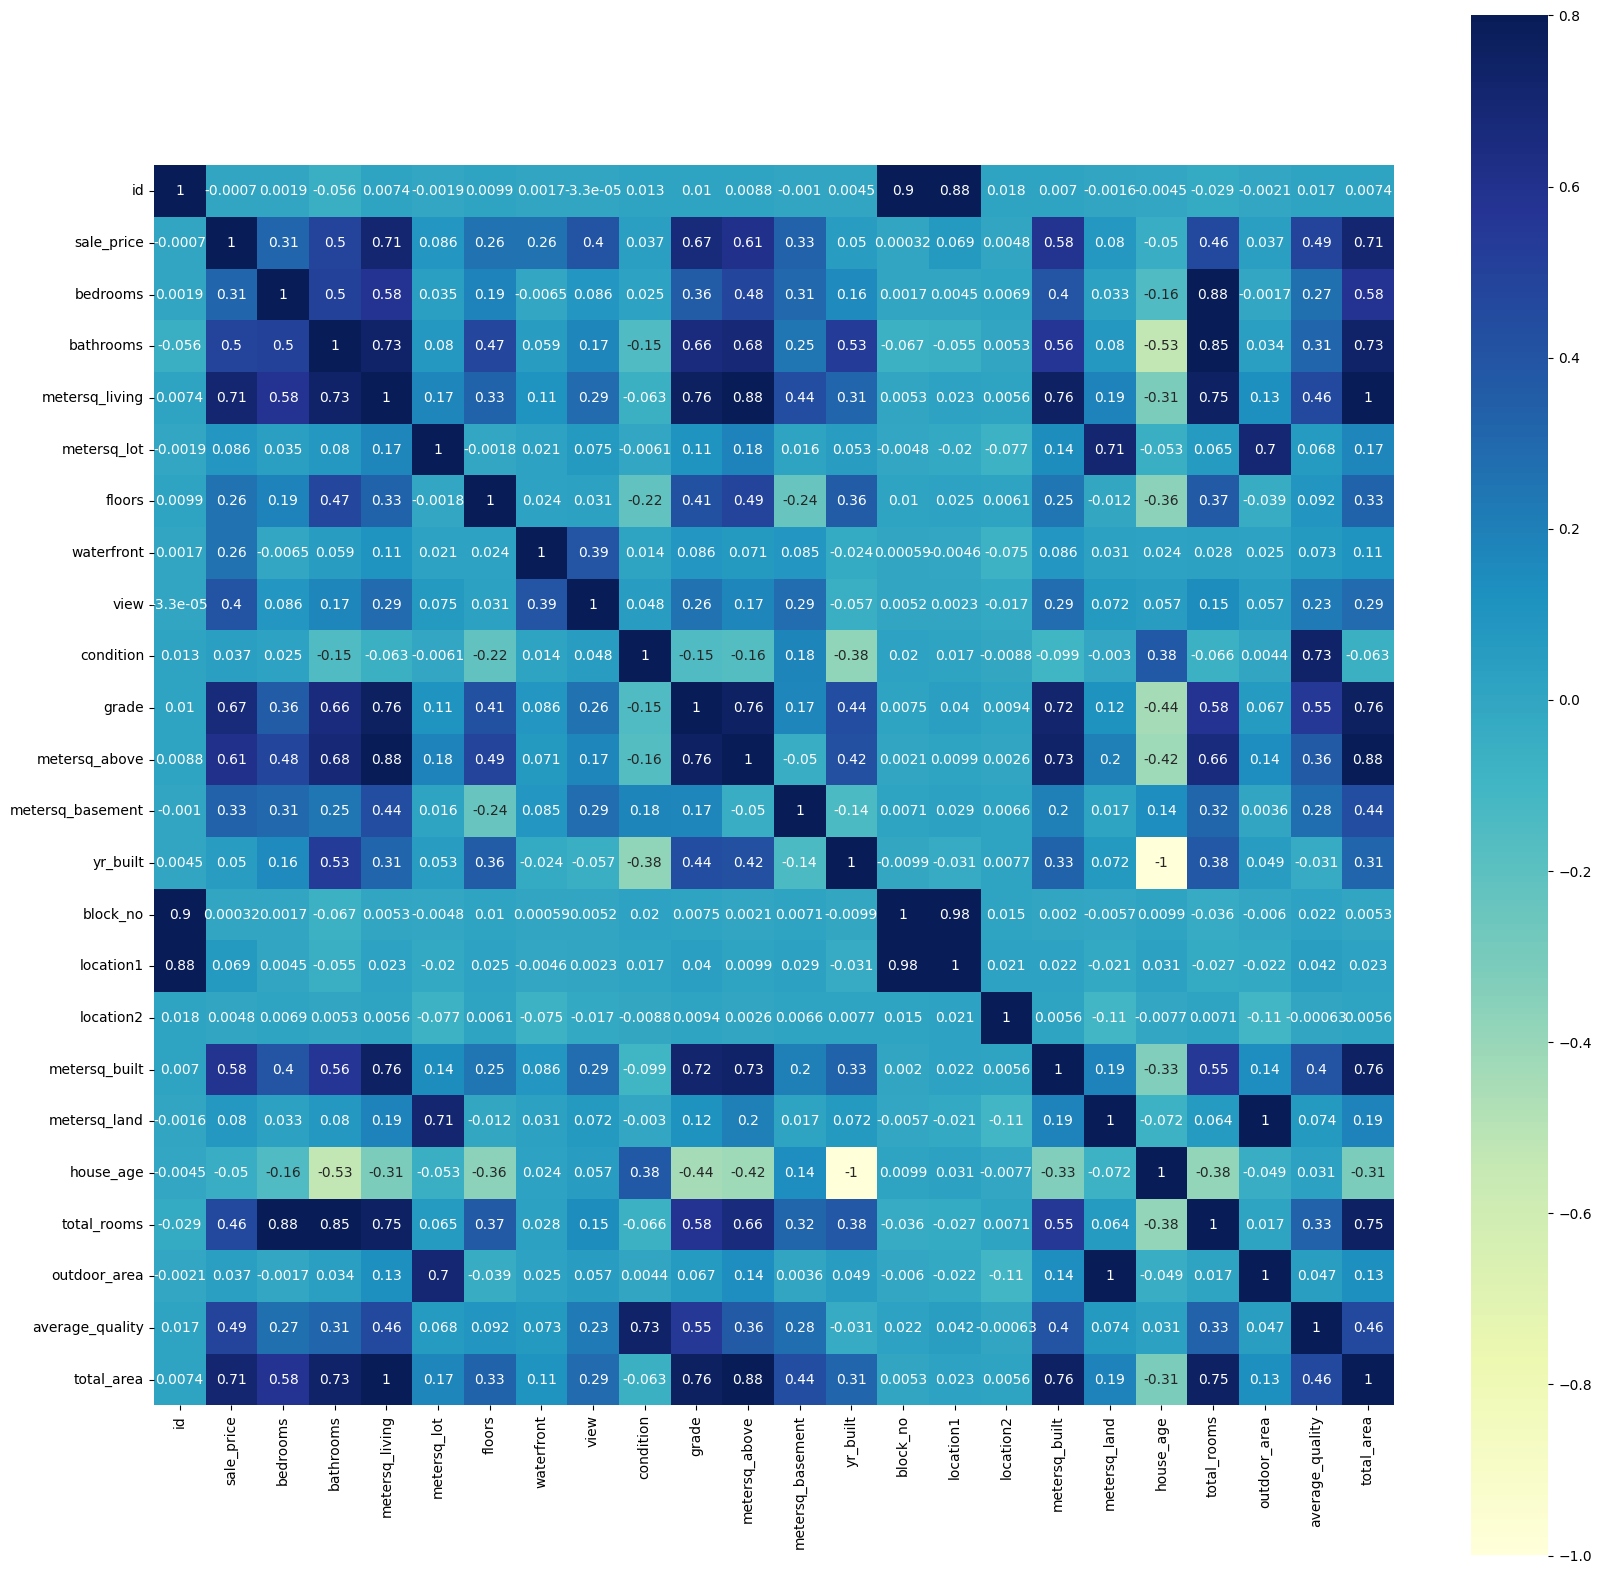

In [33]:
corrmat = df_train.corr()

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='YlGnBu', annot = True);

In [34]:
#high_corr_features = ['bedrooms', 'bathrooms', 'metersq_living','metersq_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','metersq_above', 'metersq_basement', 'yr_built', 'block_no', 'location1', 'location2', 'metersq_built', 'metersq_land', 'house_age','total_rooms', 'outdoor_area', 'average_quality', 'total_area']

high_corr_features = ['bedrooms', 'bathrooms', 'metersq_living','metersq_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','metersq_above', 'metersq_basement', 'yr_built', 'block_no', 'location1', 'location2', 'metersq_built', 'metersq_land', 'house_age','total_rooms', 'outdoor_area', 'average_quality', 'total_area']

df_train[high_corr_features]

,bedrooms,bathrooms,metersq_living,metersq_lot,floors,waterfront,view,condition,grade,metersq_above,...,block_no,location1,location2,metersq_built,metersq_land,house_age,total_rooms,outdoor_area,average_quality,total_area
0,3,1.75,1780,7567,1.0,0,0,3,7,1290,...,34,0.7314,-0.225,1910,8645,43,4.75,5575,21,3560
1,4,2.25,2510,9963,1.0,0,0,4,9,2200,...,5,0.5973,-0.177,3110,9963,56,6.25,5253,36,5020
2,3,0.75,1080,5025,1.0,0,0,3,5,1080,...,146,0.4936,-0.335,1370,6000,75,3.75,3840,15,2160
3,4,1.50,1100,9600,1.0,0,0,4,6,1100,...,33,0.7000,-0.175,1100,9630,63,5.50,7430,24,2200
4,3,1.00,1380,10112,1.0,0,0,4,7,940,...,23,0.3196,-0.351,1240,10112,60,4.00,7792,28,2760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28980,6,3.00,2180,7220,2.0,0,0,3,7,2180,...,2040,1.5346,-1.495,2260,7344,43,9.00,2984,21,4360
28981,3,1.00,1020,12289,1.0,0,0,4,7,1020,...,2046,1.6535,-1.345,1300,9894,56,4.00,7854,28,2040
28982,3,1.75,1460,8372,1.0,0,0,4,7,1460,...,2035,1.5983,-1.277,1220,7803,42,4.75,4883,28,2920
28983,2,1.00,830,5720,1.0,0,0,4,6,830,...,2038,1.9639,-1.529,1150,5250,73,3.00,3590,24,1660


In [35]:
#pd.plotting.scatter_matrix(df_train[high_corr_features], figsize = (10,8))

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
norm_train_data = df_train[high_corr_features]
norm_train_data = scaler2.fit_transform(norm_train_data)
norm_train_data

array([[-0.40564906, -0.54116429, -0.33715858, ..., -0.12418566,
        -0.88385569, -0.33715858],
       [ 0.67661695,  0.06357189,  0.45284676, ..., -0.13638589,
         1.69146034,  0.45284676],
       [-0.40564906, -1.75063664, -1.09469794, ..., -0.18992293,
        -1.9139821 , -1.09469794],
       ...,
       [-0.40564906, -0.54116429, -0.68346229, ..., -0.15040479,
         0.31795846, -0.68346229],
       [-1.48791507, -1.44826855, -1.36524771, ..., -0.19939516,
        -0.36879248, -1.36524771],
       [-0.40564906, -0.54116429, -0.93236808, ..., -0.15544401,
        -0.88385569, -0.93236808]])

In [37]:
#pd.plotting.scatter_matrix(pd.DataFrame(norm_train_data, columns=high_corr_features), figsize=(10, 8))

In [38]:
log_data = np.log(norm_train_data + 1)
#pd.plotting.scatter_matrix(pd.DataFrame(log_data, columns=high_corr_features), figsize=(10, 8))


In [39]:
df_log = pd.DataFrame(log_data, columns=high_corr_features)
df_log

,bedrooms,bathrooms,metersq_living,metersq_lot,floors,waterfront,view,condition,grade,metersq_above,...,block_no,location1,location2,metersq_built,metersq_land,house_age,total_rooms,outdoor_area,average_quality,total_area
0,-0.520285,-0.779063,-0.411219,-0.207480,-3.329878,-0.089969,-0.365129,-1.029685,-0.846249,-0.937295,...,-2.020961,-0.747842,0.022738,-0.133328,-0.166655,-0.369425,-0.779790,-0.132601,-2.152922,-0.411219
1,0.516778,0.061633,0.373525,-0.136843,-3.329878,-0.089969,-0.365129,0.630342,0.753303,0.396198,...,-2.279639,-1.357699,0.022920,0.961258,-0.109927,0.124348,0.369031,-0.146629,0.990084,0.373525
2,-0.520285,NaN,NaN,-0.288313,-3.329878,-0.089969,-0.365129,-1.029685,NaN,-1.972460,...,-1.389543,-2.406678,0.022321,-2.383087,-0.291237,0.575127,NaN,-0.210626,NaN,NaN
3,0.516778,-1.854906,NaN,-0.147229,-3.329878,-0.089969,-0.365129,0.630342,NaN,-1.812971,...,-2.028852,-0.860908,0.022927,NaN,-0.123958,0.314826,-0.048752,-0.055409,-0.460121,NaN
4,-0.520285,NaN,-1.469842,-0.132611,-3.329878,-0.089969,-0.365129,0.630342,-0.846249,NaN,...,-2.111384,NaN,0.022261,NaN,-0.103711,0.237589,NaN,-0.041016,0.276084,-1.469842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28980,1.345772,0.678377,0.091413,-0.218137,0.586666,-0.089969,-0.365129,-1.029685,-0.846249,0.379880,...,0.798413,0.569815,0.017915,0.323982,-0.225996,-0.369425,1.180916,-0.251486,-2.152922,0.091413
28981,-0.520285,NaN,NaN,-0.072735,-3.329878,-0.089969,-0.365129,0.630342,-0.846249,-2.703795,...,0.801221,0.672728,0.018486,NaN,-0.112818,0.124348,NaN,-0.038571,0.276084,NaN
28982,-0.520285,-0.779063,-1.150313,-0.183187,-3.329878,-0.089969,-0.365129,0.630342,-0.846249,-0.517265,...,0.796066,0.626263,0.018744,NaN,-0.204656,-0.419787,-0.779790,-0.162995,0.276084,-1.150313
28983,NaN,NaN,NaN,-0.265556,-3.329878,-0.089969,-0.365129,0.630342,NaN,NaN,...,0.797475,0.900105,0.017785,NaN,-0.329584,0.536181,NaN,-0.222388,-0.460121,NaN


In [40]:
target = df_train['sale_price'].to_numpy()
target

array([442573., 800000., 205000., ..., 225000., 225000., 220000.])

In [41]:
df_train['sale_price']

0        442573.0
1        800000.0
2        205000.0
3        353000.0
4        230000.0
           ...   
28980    230000.0
28981    230000.0
28982    225000.0
28983    225000.0
28984    220000.0
Name: sale_price, Length: 28985, dtype: float64

In [42]:
x_train, x_test, y_train, y_test = train_test_split(df_train.drop(['id', 'sale_price'], axis = 1), df_train['sale_price'], test_size=0.3, random_state=42)

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor


#model = LinearRegression()-
#model = RandomForestRegressor()-
model = XGBRegressor()
#model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
#model = KNeighborsRegressor(n_neighbors = 10)-
#model = Lasso()-
#model = DecisionTreeRegressor()-
#model = Ridge(alpha=0.1)
#model = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, max_depth=5, min_samples_leaf=10)
#model = MLPRegressor(hidden_layer_sizes=(100,))
#model = SVR(kernel='rbf',C=10.0, gamma='scale', epsilon=0.1)

#dtrain = xgb.DMatrix(x_train, label=y_train)
#params = {'objective': 'reg:squarederror','max_depth': 6,'eta': 0.3,'subsample': 0.8,'colsample_bytree': 0.8}
#model = xgb.train(params, dtrain)


In [44]:
my_model = model.fit(x_train, y_train)

In [45]:
y_test_predict = model.predict(x_test)
model.score(x_test, y_test)

0.9020991997606437

In [46]:
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
print('Root mean Squared Error:' , rmse)

Root mean Squared Error: 115162.48399619506


In [47]:

df1 = pd.DataFrame(id_test, columns = ['id'])

norm_test_data = df_test[high_corr_features]
norm_test_data = scaler2.fit_transform(norm_test_data)

log_test_data = np.log(norm_test_data + 1)
df_test_log = pd.DataFrame(log_test_data, columns=high_corr_features)
df_test_log

,bedrooms,bathrooms,metersq_living,metersq_lot,floors,waterfront,view,condition,grade,metersq_above,...,block_no,location1,location2,metersq_built,metersq_land,house_age,total_rooms,outdoor_area,average_quality,total_area
0,-0.483340,0.690814,0.621784,-0.314665,0.593975,-0.097488,1.202427,-0.948993,0.270396,0.211066,...,-1.507850,-1.075495,0.026927,0.407033,-0.364738,1.072476,0.253178,-0.422843,-0.393901,0.621784
1,0.498808,0.690814,0.031860,-0.186501,-3.117523,-0.097488,-0.359700,0.653672,-0.808297,-1.080845,...,-1.757617,-0.725332,0.027538,0.016256,-0.168691,-0.176555,0.662098,-0.148058,0.315982,0.031860
2,NaN,-0.256400,NaN,-0.368691,0.593975,-0.097488,-0.359700,-0.948993,-0.808297,-1.772812,...,-1.517299,-0.928898,0.026954,-1.913637,-0.391439,1.106951,NaN,-0.308946,-1.886955,NaN
3,-0.483340,-0.758314,-0.233009,-0.264142,-3.117523,-0.097488,-0.359700,1.240703,-0.808297,NaN,...,-1.396700,-1.456346,0.027161,-0.058946,-0.350610,0.397036,-0.745108,-0.301429,0.952306,-0.233009
4,-0.483340,-1.813522,0.339064,-0.224216,-3.117523,-0.097488,-0.359700,-0.948993,-0.808297,0.583205,...,-1.512564,-1.596478,0.027222,-0.074690,-0.245647,0.565757,-1.164762,-0.297940,-1.886955,0.339064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,NaN,-1.813522,-0.824720,0.119356,-3.117523,-0.097488,-0.359700,0.653672,-0.808297,-0.326020,...,0.810192,0.647018,0.023571,0.346420,0.150347,0.397036,NaN,0.174997,0.315982,-0.824720
7244,-0.483340,-0.256400,-0.555547,-0.230642,0.593975,-0.097488,-0.359700,0.653672,-0.808297,-0.137105,...,0.812966,0.548049,0.023812,-0.998489,-0.218876,0.105732,-0.450407,-0.198564,0.315982,-0.555547
7245,NaN,NaN,NaN,-0.259420,-3.117523,-0.097488,-0.359700,-0.948993,NaN,-2.013330,...,0.805550,0.735679,0.023464,NaN,-0.282818,0.275016,NaN,-0.204891,NaN,NaN
7246,0.498808,NaN,NaN,-0.242935,-3.117523,-0.097488,-0.359700,0.653672,NaN,-2.463602,...,0.799017,0.725427,0.023757,-1.651712,-0.258311,0.441959,-0.450407,-0.178452,-0.393901,NaN


In [48]:
#model.save_model('xgb_model.bin')
#model.load_model('xgb_model.bin')
#Y_pred = model.predict(xgb.DMatrix(df_test_log))

Y_pred = model.predict(df_test_log)

Y_Pred = Y_pred.round()

df2 = pd.DataFrame(Y_pred, columns = ['price'])
df2['price'].round()

0       149546.0
1        81572.0
2        81572.0
3        81572.0
4        81572.0
          ...   
7243    184809.0
7244    126108.0
7245     82053.0
7246    155223.0
7247    209639.0
Name: price, Length: 7248, dtype: float32

In [49]:
#adding the Id column to the dataframe
submission = pd.concat([df1,df2.abs()],axis=1)
submission.to_csv('/kaggle/working/submission.csv',index=False) # save to notebook output
print(submission)

         id          price
0     17292  149546.187500
1     17293   81571.875000
2     17294   81571.875000
3     17295   81571.875000
4     17296   81571.875000
...     ...            ...
7243  36230  184809.437500
7244  36231  126108.031250
7245  36232   82052.585938
7246  36233  155222.718750
7247  36234  209639.484375

[7248 rows x 2 columns]
